In [55]:
#This week's assignment will involve me going through the tutorial file and completing the assignments
#Where it is specified in the document. Each assignment section will be clearly started and ended
#With comments 'ASSIGNMENT START' and 'ASSIGNMENT END', respectively.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, precision_recall_curve
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

import os
#os.chdir("/content/drive/")
os.chdir("/content/drive/My Drive")
!ls

 churn-bigml-20.csv	       heart.csv
'Colab Notebooks'	       IRIS.csv
 Cuisine_rating.csv	      'Loan Prediction.csv'
 Diabetes-Classification.csv   Mall_Customers.csv
 fitness_class_2212.csv        weather_data_extended.csv


In [3]:
df = pd.read_csv('Diabetes-Classification.csv')

print("\nData Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()


Data Shape: (128, 11)

First 5 Rows:


,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20.0,Normal,80,5.0,No,No,Healthy,NaN,No


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                           0
Gender                        0
BMI                           3
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    2
Smoking                       2
Diet                          2
Exercise                      1
Diagnosis                     0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
#Check Column Names
print("\n Column Names:")
print(df.columns)


 Column Names:
Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')


In [7]:
#Preprocessing
#Identify categorical and numerical columns
categorical_cols = ['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise']
numerical_cols = ['Age', 'BMI', 'FBS', 'HbA1c']

#Target Column
target_column = 'Diagnosis'

In [8]:
#Create a ColumnTransformer to preprocess the data in the columns
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols)
    ]
)

In [9]:
#Split features and target
X = df.drop(target_column, axis = 1)
y = df[target_column]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
#Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

#Convert y_train and y_test to binary (label encoding)
y_train = y_train.map({'No': 0, 'Yes': 1}).values
y_test = y_test.map({'No': 0, 'Yes': 1}).values

In [11]:
#Convert X_train_scaled and X_test_scaled to numpy arrays (Tensorflow does not accept pandas dataframes as an input, it accepts either tensorflow tensors or numpy arrays)
X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_test_scaled.astype('float32')

In [12]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

#suppress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#Building the tensorflow MLP model
tf_model = Sequential([
    Input(shape = (X_train_scaled.shape[1],)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

In [13]:
#Compile the model
tf_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Train the model
history = tf_model.fit(X_train_scaled, y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.4921 - loss: 0.6844 - val_accuracy: 0.5294 - val_loss: 0.6831
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5738 - loss: 0.6537 - val_accuracy: 0.2941 - val_loss: 0.6575
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7209 - loss: 0.5898 - val_accuracy: 0.2941 - val_loss: 0.6368
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7790 - loss: 0.5687 - val_accuracy: 0.4706 - val_loss: 0.6205
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7055 - loss: 0.5486 - val_accuracy: 0.4706 - val_loss: 0.6078
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7210 - loss: 0.5002 - val_accuracy: 0.4706 - val_loss: 0.5974
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7363 - loss: 0.5125 - val_accuracy: 0.5882 - val_loss: 0.5885
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8102 - loss: 0.4647 - val_accuracy: 0.5882 - val_loss: 0.5804

In [14]:
#Evaluate the model
y_pred_tf = (tf_model.predict(X_test_scaled) > 0.5).astype(int)
print("\nTensorFlow MLP Performance:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_tf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tf))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

TensorFlow MLP Performance:

Accuracy: 0.8611111111111112

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.44      0.62         9

    accuracy                           0.86        36
   macro avg       0.92      0.72      0.77        36
weighted avg       0.88      0.86      0.84        36


Confusion Matrix:
[[27  0]
 [ 5  4]]


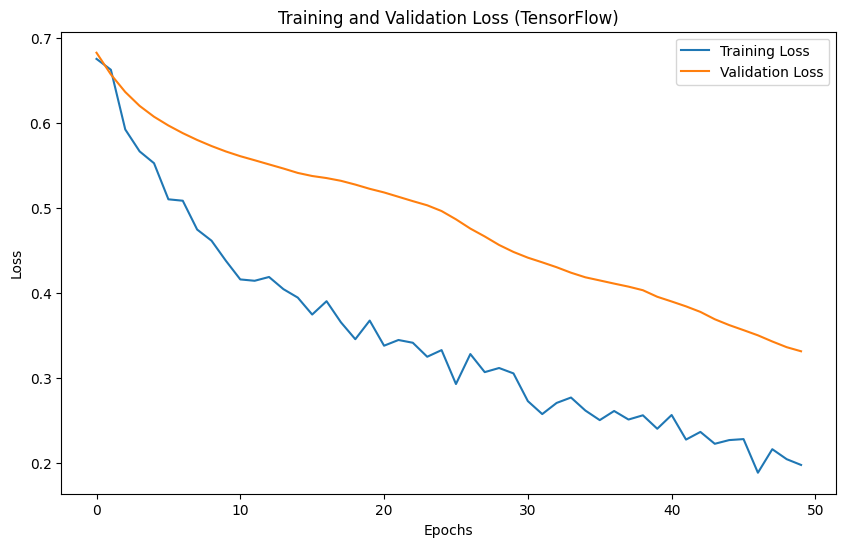

In [15]:
#Plot training history
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (TensorFlow)')
plt.legend()
plt.show()


Class Distribution
Diagnosis
No     88
Yes    30
Name: count, dtype: int64


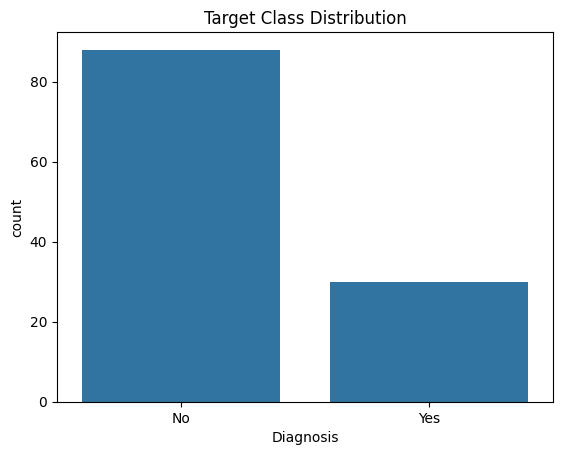

In [16]:
#ASSIGNMENT START
#First - Check and deal with the dataset imbalance
#So we want to begin by checking for imbalance in our target column

print("\nClass Distribution")
print(df['Diagnosis'].value_counts())
sns.countplot(x = 'Diagnosis', data = df)
plt.title("Target Class Distribution")
plt.show()

In [17]:
#Assignment Cell
#As we can see, we have significantrly more 'no' outcomes than 'yes' outcomes
#To deal with this imbalance, I will be applying SMOTE to the training set
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

In [18]:
#Assignment Cell
#Now we want to create a new tensorflow model for the balanced data to train on

balanced_model = Sequential([
    Input(shape = (X_train_smote.shape[1],)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')

])

balanced_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
#Assignment Cell

#Train the new model using the smote data

history_smote = balanced_model.fit(X_train_smote, y_train_smote, epochs = 50, batch_size = 16, validation_split = 0.2, verbose = 1)

#Evaluate the model on the original test set (we do not want to use SMOTE on the test data)

y_pred_smote = (balanced_model.predict(X_test_scaled)> 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6748 - loss: 0.6085 - val_accuracy: 0.0000e+00 - val_loss: 0.8890
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6662 - loss: 0.5560 - val_accuracy: 0.0000e+00 - val_loss: 0.8271
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6477 - loss: 0.5309 - val_accuracy: 0.0400 - val_loss: 0.7618
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6893 - loss: 0.5111 - val_accuracy: 0.3600 - val_loss: 0.7086
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6945 - loss: 0.4939 - val_accuracy: 0.7600 - val_loss: 0.6796
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7394 - loss: 0.4877 - val_accuracy: 0.8000 - val_loss: 0.6671
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7971 - loss: 0.4369 - val_accuracy: 0.8400 - val_loss: 0.6517
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7608 - loss: 0.4391 - val_accuracy: 0.8400 - val_loss:

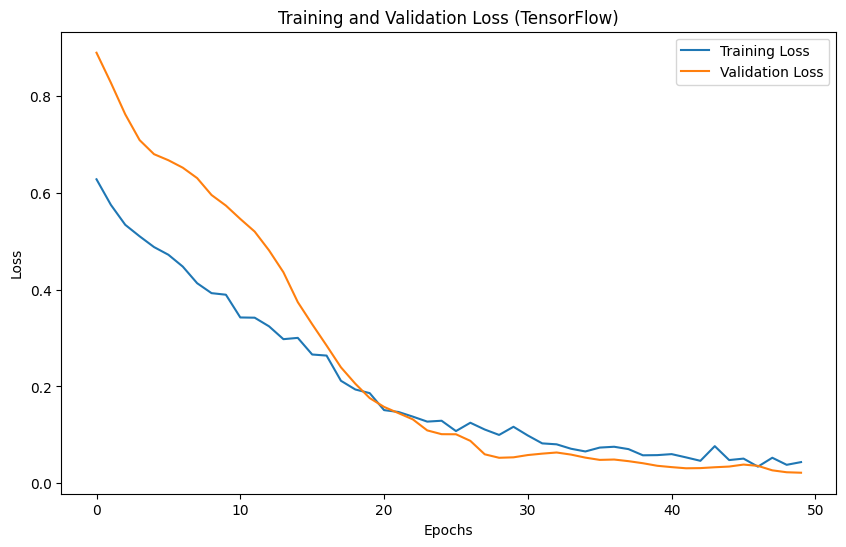

In [20]:
#Assignment Cell
#Plot training history
plt.figure(figsize = (10, 6))
plt.plot(history_smote.history['loss'], label = 'Training Loss')
plt.plot(history_smote.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (TensorFlow)')
plt.legend()
plt.show()

In [21]:
#Assignment Cell
#Now I want to fine tune the neural network by changing the hyperparameter values and reporting my findings (also using cross-validation)

#Since we are going to be testing different hyperparameter combinations, let's create a function that creates a fresh neural network every time we do this

def build_model(n1 = 64, n2 = 32, dropout_rate = 0.2, learning_rate = 0.001):
  model = Sequential([
      Input(shape =(X_train_scaled.shape[1],)),
      Dense(n1, activation = 'relu'),
      Dropout(dropout_rate),
      Dense(n2, activation = 'relu'),
      Dropout(dropout_rate),
      Dense(1, activation = 'sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [22]:
#Assignment Cell
#Next I want to define the different hyperparameter combinations I want to try

hyperparameter_grid = [
    {"n1": 32, "n2": 16, "dropout_rate": 0.1, "learning_rate": 0.001, "batch_size": 16},
    {"n1": 64, "n2": 32, "dropout_rate": 0.2, "learning_rate": 0.001, "batch_size": 16},
    {"n1": 128, "n2": 64, "dropout_rate": 0.3, "learning_rate": 0.0005, "batch_size": 32}
]

In [23]:
#Assignment Cell
#Now I need to set up K fold cross validation

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [24]:
#Assignment Cell
#Now we test every hyperparameter combination using 5 folds each

results = []

for params in hyperparameter_grid:
  fold_accuracies = []
  fold_f1_scores = []

  print("\nTesting Hyperparameters:\n", params)

  for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {fold+1}/5")

    #Training and validation folds
    X_train_fold = X_train_scaled[train_idx]
    y_train_fold = y_train[train_idx]

    X_val_fold = X_train_scaled[val_idx]
    y_val_fold = y_train[val_idx]

    #Applying SMOTE only to teh training fold

    sm = SMOTE(random_state = 42)
    X_train_smote_fold, y_train_smote_fold = sm.fit_resample(X_train_fold, y_train_fold)

    #Build the model with current hyperparameters
    model = build_model(
        n1 = params["n1"],
        n2 = params["n2"],
        dropout_rate = params["dropout_rate"],
        learning_rate = params["learning_rate"]

    )

    #Train

    model.fit(X_train_smote_fold, y_train_smote_fold, epochs = 40, batch_size = params["batch_size"], verbose = 0)

    #Validate

    val_pred = (model.predict(X_val_fold) > 0.5).astype(int)

    acc = accuracy_score(y_val_fold, val_pred)
    f1 = f1_score(y_val_fold, val_pred)

    fold_accuracies.append(acc)
    fold_f1_scores.append(f1)

  #Save the results for this combination of hyperparameters

  results.append({
      "params": params,
      "cv_accuracy_mean": np.mean(fold_accuracies),
      "cv_accuracy_std": np.std(fold_accuracies),
      "cv_f1_mean": np.mean(fold_f1_scores),
      "cv_f1_std": np.std(fold_f1_scores),
  })


Testing Hyperparameters:
 {'n1': 32, 'n2': 16, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 16}
Fold 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Fold 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Fold 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Fold 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Fold 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Testing Hyperparameters:
 {'n1': 64, 'n2': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 16}
Fold 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Fold 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Fold 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Fold 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Fold 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Testing Hyperparameters:
 {'n1': 128, 'n2': 64, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 32}
Fold 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Fold 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Fold 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Fold 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Fold 5

In [25]:
#Assignment Cell
#To make it easier, we can display the results in a table

results_df = pd.DataFrame(results)
results_df

#Model 1 has the highest accuracy score and the highest mean f1 score, making it the best model out of these three. These values are very important for imbalanced datasets
#We can see that a moderate sized network performs the best - one that is too small underfits, one that is too larger overfits
#A dropout of 0.2  helps regularization without hurting learning
#A high f1 score shows model 1 balances minority-class detection and overall accuracy
#Small datasets benefit from a network that is neither too simple nor too complex

,params,cv_accuracy_mean,cv_accuracy_std,cv_f1_mean,cv_f1_std
0,"{'n1': 32, 'n2': 16, 'dropout_rate': 0.1, 'lea...",0.938971,0.039569,0.844615,0.113211
1,"{'n1': 64, 'n2': 32, 'dropout_rate': 0.2, 'lea...",0.963235,0.030048,0.902564,0.122863
2,"{'n1': 128, 'n2': 64, 'dropout_rate': 0.3, 'le...",0.938971,0.039569,0.844615,0.113211


In [45]:
#Assignment Cell

#Knowing our best model is the first model, we want to use this for training our data

best_params = {
    "n1": 64,
    "n2": 32,
    "dropout_rate": 0.2,
    "learning_rate": 0.001,
    "batch_size": 16
}

In [46]:
#Assignment Cell

#Train this model on full SMOTE training data

final_model = build_model(n1 = best_params["n1"], n2 = best_params["n2"], dropout_rate = best_params["dropout_rate"], learning_rate = best_params["learning_rate"])

#Apply SMOTE only to training set
sm = SMOTE(random_state = 42)
X_train_smote_final, y_train_smote_final = sm.fit_resample(X_train_scaled, y_train)

#Train final model
final_history = final_model.fit(
    X_train_smote_final,
    y_train_smote_final,
    epochs = 60,
    batch_size = best_params["batch_size"],
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5081 - loss: 0.6843 - val_accuracy: 0.3200 - val_loss: 0.7162
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5655 - loss: 0.6409 - val_accuracy: 0.4000 - val_loss: 0.6988
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7068 - loss: 0.5861 - val_accuracy: 0.4400 - val_loss: 0.7034
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7321 - loss: 0.5442 - val_accuracy: 0.4000 - val_loss: 0.7117
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7643 - loss: 0.5264 - val_accuracy: 0.4000 - val_loss: 0.7062
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7105 - loss: 0.4778 - val_accuracy: 0.8000 - val_loss: 0.6807
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7793 - loss: 0.4696 - val_accuracy: 0.8800 - val_loss: 0.6406
Epoch 8/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8115 - loss: 0.3911 - val_accuracy: 0.9200 - val_loss: 0.6040

In [47]:
#Assignment Cell

#Predict on the original test set
y_pred_final = (final_model.predict(X_test_scaled)> 0.5).astype(int)

print("\nFinal Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

Final Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[27  0]
 [ 0  9]]


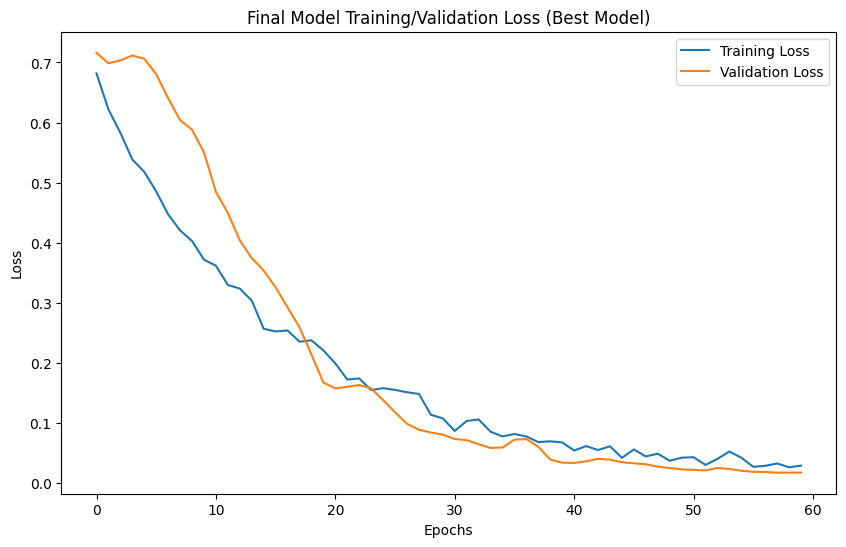

In [48]:
#Assignment Cell
#Plot the trainin curves
plt.figure(figsize=(10, 6))
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title("Final Model Training/Validation Loss (Best Model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#The final model uses a moderate sized network with a drop of 0.2 which balanced complexity with regularisation
#Trained on SMOTE resampled data to handle the class imbalance
#Evaluation on original test set shows accuracy and f1, emphasising performance on minority class
#The training curves are very close to each other which indicates the model is not overfitting, as well as representing steady learning and good generalisation

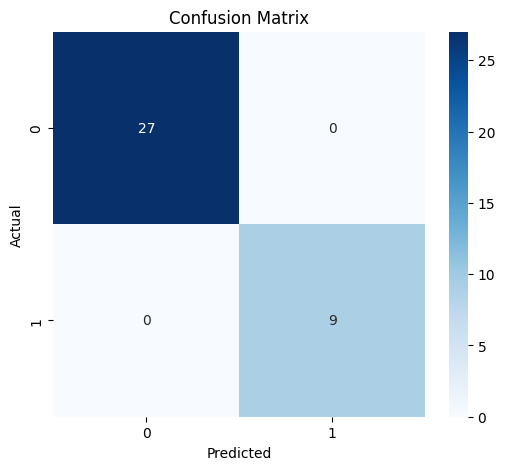

In [49]:
#Assignment Cell
#We can finally use other evaluation metrics and plots to visualise the performance of the model
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


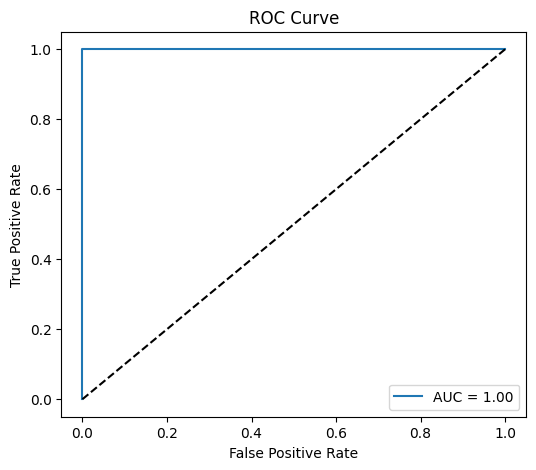

In [54]:
#Assignment Cell
#ROC curve and AUC

y_pred_proba = final_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

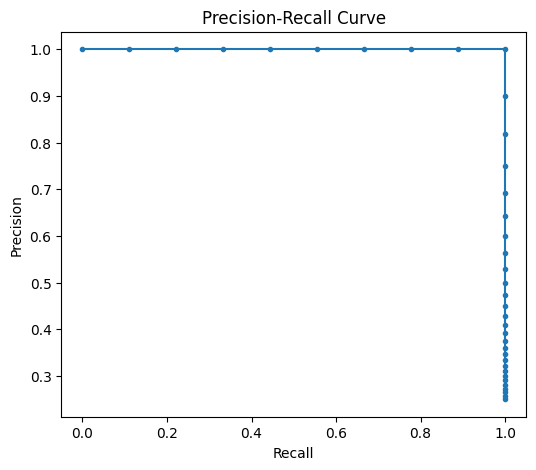

In [56]:
#Assignment Cell
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [33]:
#Assignment Cell
#The model performs extremely well on this data set, but it is quite a small dataset
#In the real world a 100% accuracy would be extremely rare
#So take this example as more of a proof of concept rather than a real world predictor

#The danger with the smaller dataset is that SMOTE may be memorising patterns rather than generalising
#Also, it would be very sensitive to randomness - some different samples could drastically change metrics

In [34]:
#Assignment END